# Import the data

In [2]:
import pandas as pd
import numpy as np
import sqlite3
df = pd.read_csv("data/kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ M

# Check for dupes

In [4]:
# look for duplicates - no dupes
duplicate_rows_df = df[df.duplicated()]
print(len(duplicate_rows_df))

0


# Extraneous values

In [5]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [32]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is majority of values
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [33]:
# check it worked
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

# Null values

In [8]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# drop waterfront and view since I don't care about those
df = df.drop('waterfront', axis=1)
df = df.drop('view', axis=1)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [34]:
# convert nan to 0 
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

In [35]:
# check it worked -- converting the 0 did not just come in as '0' , it came in correctly as 0.0
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
# check it worked - null values filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
class_scale      21338 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


In [31]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

# EDA with visualizations

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [15]:
# .round() takes it out of scientific notation
df['price'].describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


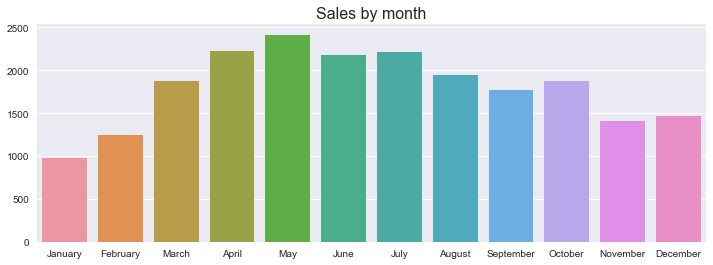

In [37]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


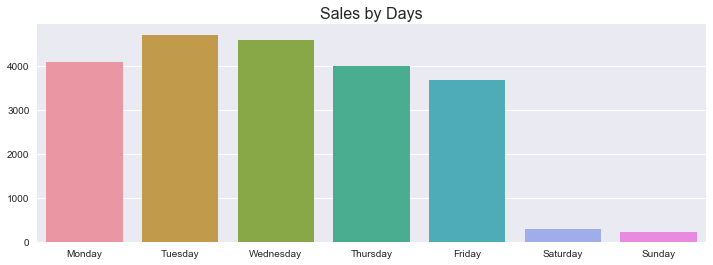

In [38]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(12,4))
sns.barplot(day_of_week,daily_sales)
plt.title('Sales by Days', fontdict={'fontsize': 16})
plt.show()

# Create new column based on conditions

In [16]:
# upper class = 1
# middle class = 2
# lower class = 3

df.loc[df['price'] > 750000, 'class_scale'] = 1
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = 2
df.loc[df['price'] < 350000, 'class_scale'] = 3

In [17]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

price                                grade             
                  mean       min        max       std  mean min max  std
class_scale                                                             
1.0          1134069.0  750500.0  7700000.0  526345.0   9.0   5  13  1.0
2.0           513097.0  350500.0   749999.0  107887.0   8.0   4  11  1.0
3.0           267015.0   78000.0   349990.0   54355.0   7.0   3  10  1.0

In [18]:
# upper class = 17%
# middle class = 52% 
# lower class = 31%
df.class_scale.value_counts()

2.0    11145
3.0     6614
1.0     3579
Name: class_scale, dtype: int64

In [19]:
%pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [20]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
zipcode = search.by_zipcode("10001")
zipcode

SimpleZipcode(zipcode='10001', zipcode_type='Standard', major_city='New York', post_office_city='New York, NY', common_city_list=['New York'], county='New York County', state='NY', lat=40.75, lng=-73.99, timezone='Eastern', radius_in_miles=0.9090909090909091, area_code_list=['718', '917', '347', '646'], population=21102, population_density=33959.0, land_area_in_sqmi=0.62, water_area_in_sqmi=0.0, housing_units=12476, occupied_housing_units=11031, median_home_value=650200, median_household_income=81671, bounds_west=-74.008621, bounds_east=-73.984076, bounds_north=40.759731, bounds_south=40.743451)

In [25]:
df.zipcode.nunique()

70

In [22]:
zipcode.to_dict()

{'zipcode': '10001',
 'zipcode_type': 'Standard',
 'major_city': 'New York',
 'post_office_city': 'New York, NY',
 'common_city_list': ['New York'],
 'county': 'New York County',
 'state': 'NY',
 'lat': 40.75,
 'lng': -73.99,
 'timezone': 'Eastern',
 'radius_in_miles': 0.9090909090909091,
 'area_code_list': ['718', '917', '347', '646'],
 'population': 21102,
 'population_density': 33959.0,
 'land_area_in_sqmi': 0.62,
 'water_area_in_sqmi': 0.0,
 'housing_units': 12476,
 'occupied_housing_units': 11031,
 'median_home_value': 650200,
 'median_household_income': 81671,
 'bounds_west': -74.008621,
 'bounds_east': -73.984076,
 'bounds_north': 40.759731,
 'bounds_south': 40.743451}

In [30]:
res = search.by_population(lower=0, upper=999999999,
sort_by=zipcode.population, ascending=False, returns=10)
for zipcode in res:
    print(zipcode)

AttributeError: 'int' object has no attribute 'name'

In [20]:
zcode = pd.DataFrame(df['zipcode'])
print (zcode)

       zipcode
0        98178
1        98125
2        98028
3        98136
4        98074
...        ...
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144

[21597 rows x 1 columns]


In [28]:
# from osgeo import gdal, ogr, osr
# from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

ModuleNotFoundError: No module named 'geopandas'

In [25]:
def zco(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x))['City']
        return city if city else x

zcode['City'] = zcode['zipcode'].apply(zco)
print (zcode)

TypeError: 'SimpleZipcode' object is not subscriptable

In [23]:
def zco(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x))['City']
        return city if city else x

zcode['City'] = zcode['zipcode'].apply(zco)
print (zcode)

TypeError: 'SimpleZipcode' object is not subscriptable

In [ ]:
df.cut(['price'], 3, )

In [26]:
pd.plotting.scatter_matrix()

TypeError: scatter_matrix() missing 1 required positional argument: 'frame'

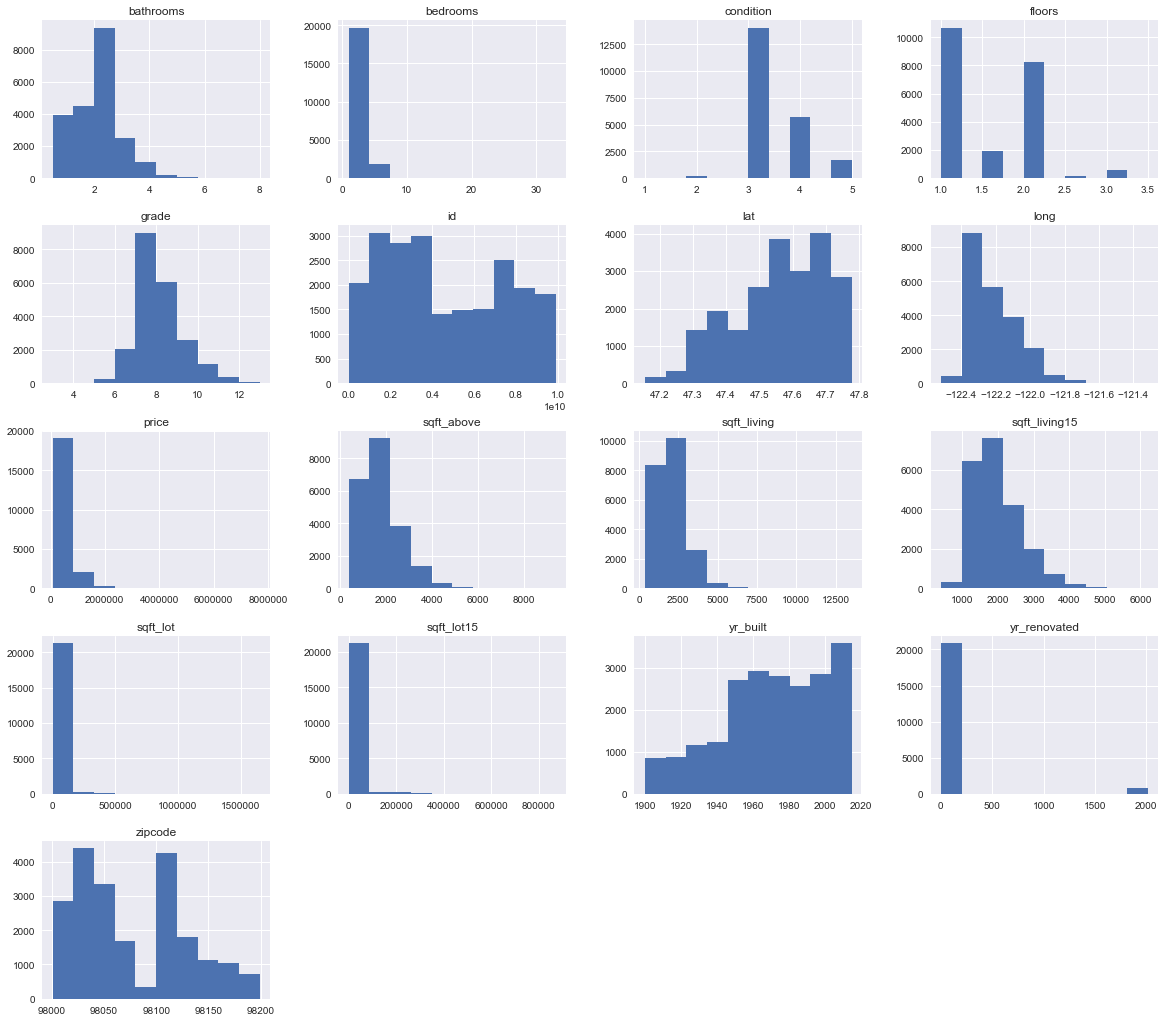

In [22]:
# create histograms for all numeric columns to get idea of distributions
df.hist(figsize = (20,18));

# Homoscedasticity

Check Linearity for each column. Does col[x] have a linear relationship with price?

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


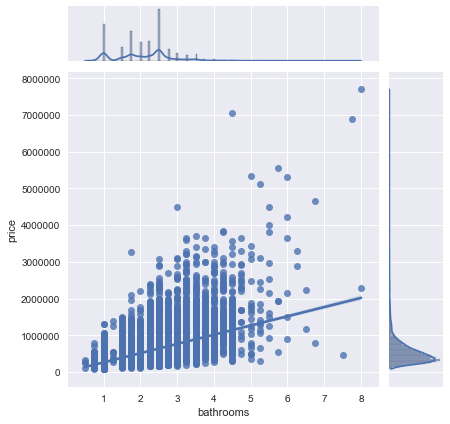

In [24]:
# use jointplot to check for linearity 
sns.jointplot('bathrooms','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


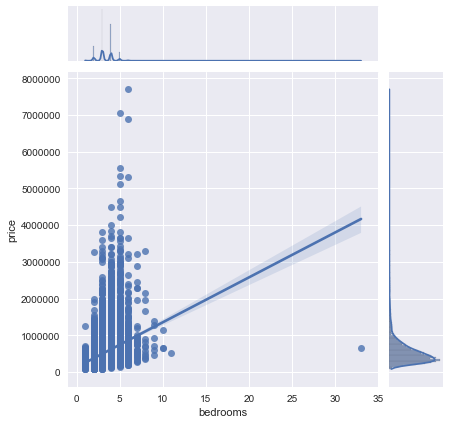

In [25]:
sns.jointplot('bedrooms','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


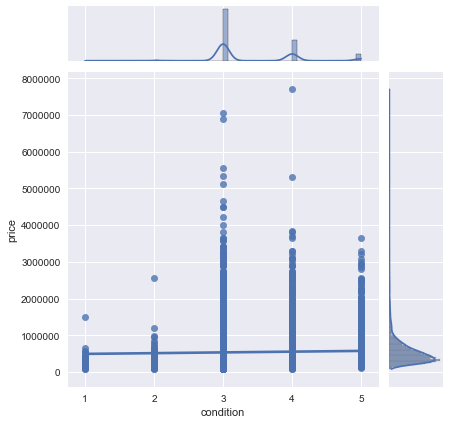

In [28]:
sns.jointplot('condition','price', data=df, kind='reg');

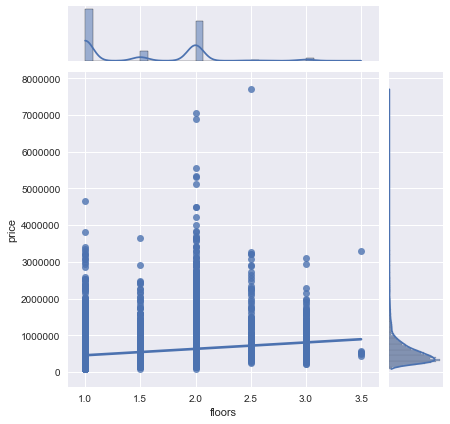

In [27]:
sns.jointplot('floors','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


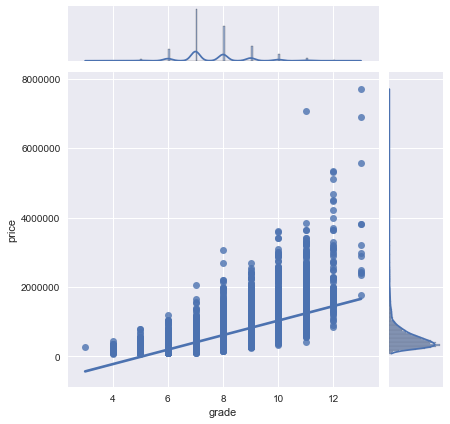

In [23]:
sns.jointplot('grade','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


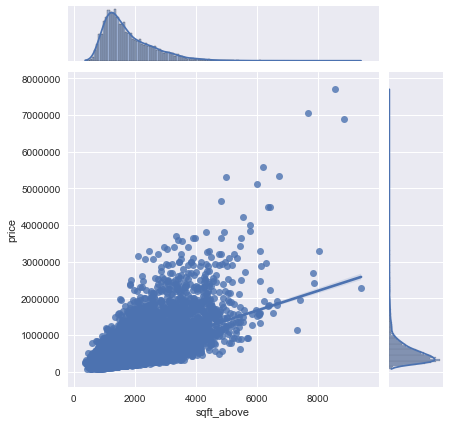

In [29]:
sns.jointplot('sqft_above','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: 0.0 is not a string

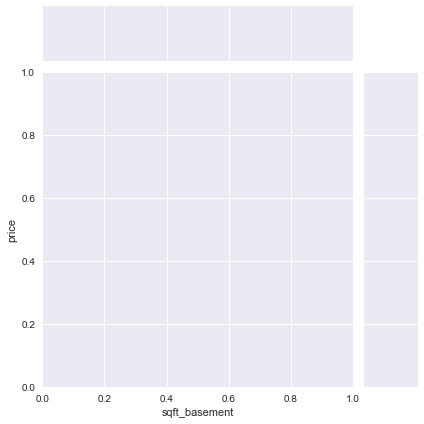

In [30]:
sns.jointplot('sqft_basement','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


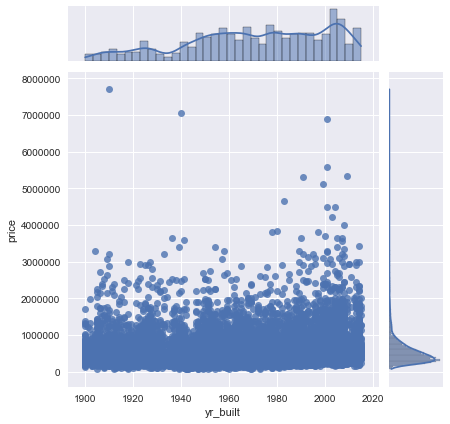

In [31]:
sns.jointplot('yr_built','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


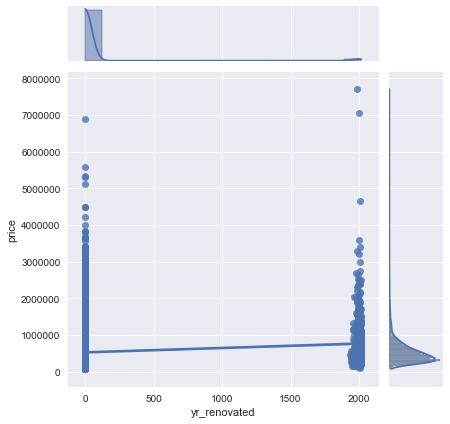

In [32]:
sns.jointplot('yr_renovated','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


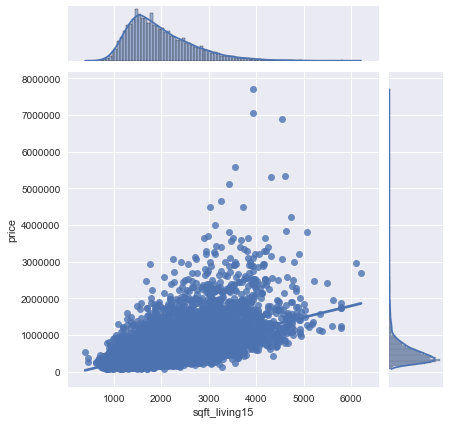

In [34]:
sns.jointplot('sqft_living15','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


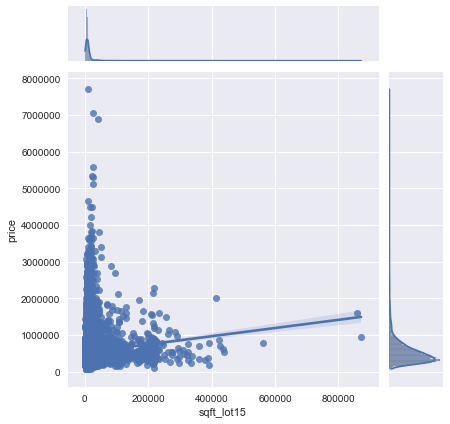

In [35]:
sns.jointplot('sqft_lot15','price', data=df, kind='reg');

# Multicolinearity: 'bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15' have strong linear relationships to price

floors and condition have little to no linear relationship to price

In [36]:
# checking for multicolinearity across those that had highest linear correlation
# keep grade, bedrooms, bathrooms
# grade, sqft_living15, and sqft_above all have too high multicolinearity (above 65%) so only need one
feats = ['bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15']
corr = df[feats].corr()
corr

,grade,sqft_living15,bedrooms,bathrooms,sqft_above
grade,1.000000,0.713867,0.356563,0.665838,0.756073
sqft_living15,0.713867,1.000000,0.393406,0.569884,0.731767
bedrooms,0.356563,0.393406,1.000000,0.514508,0.479386
bathrooms,0.665838,0.569884,0.514508,1.000000,0.686668
sqft_above,0.756073,0.731767,0.479386,0.686668,1.000000


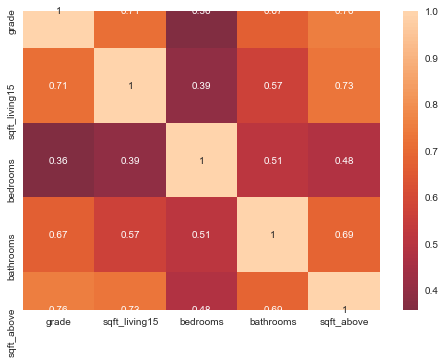

In [37]:
sns.heatmap(corr, center=0, annot=True);